In [7]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

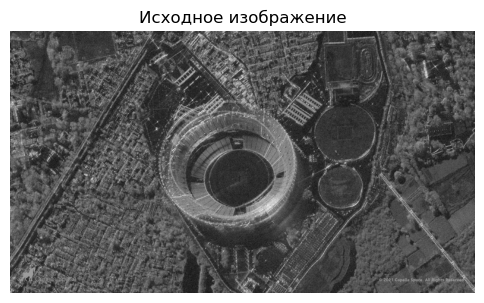

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(image_gray, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')
plt.show()

1. Зашумление изображения

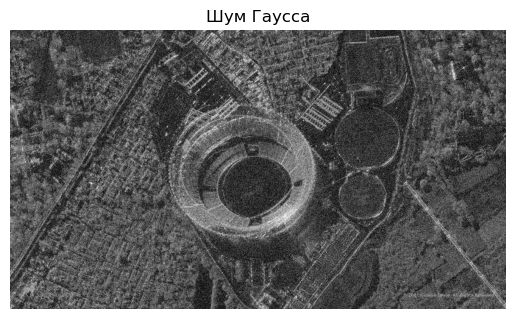

In [3]:
#параметры шума Гаусса
mean = 0
stddev = 30
noise_gauss = np.zeros(image_gray.shape, dtype=np.float32)
cv2.randn(noise_gauss, mean, stddev)

#добавление шума к изображению
noisy_image = image_gray.astype(np.float32) + noise_gauss
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

#отображение изображения с шумом
plt.imshow(noisy_image, cmap='gray')
plt.title("Шум Гаусса")
plt.axis('off')
plt.show()

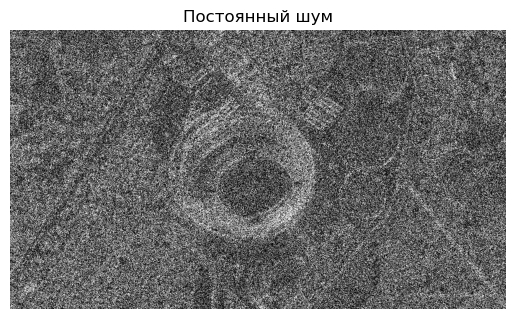

In [4]:
#параметры постоянного шума
a = -210
b = 210

noise_uniform = np.random.uniform(a, b, image_gray.shape).astype(np.float32)

#добавление шума к изображению
noisy_image_uniform = image_gray.astype(np.float32) + noise_uniform
noisy_image_uniform = np.clip(noisy_image_uniform, 0, 255).astype(np.uint8)

#отображение изображения с постоянным шумом
plt.imshow(noisy_image_uniform, cmap='gray')
plt.title("Постоянный шум")
plt.axis('off')
plt.show()

2. Тестирование алгоритмов подавления шума

MSE (Медианный фильтр): 258.2405518518519, SSIM: 0.5403724677342835
MSE (Гауссов фильтр): 176.77215432098765, SSIM: 0.6771762231922188
MSE (Билатериальный фильтр): 211.60055432098764, SSIM: 0.6066253566224407
MSE (Фильтр нелокальных средних): 251.2322049382716, SSIM: 0.5233103969631909


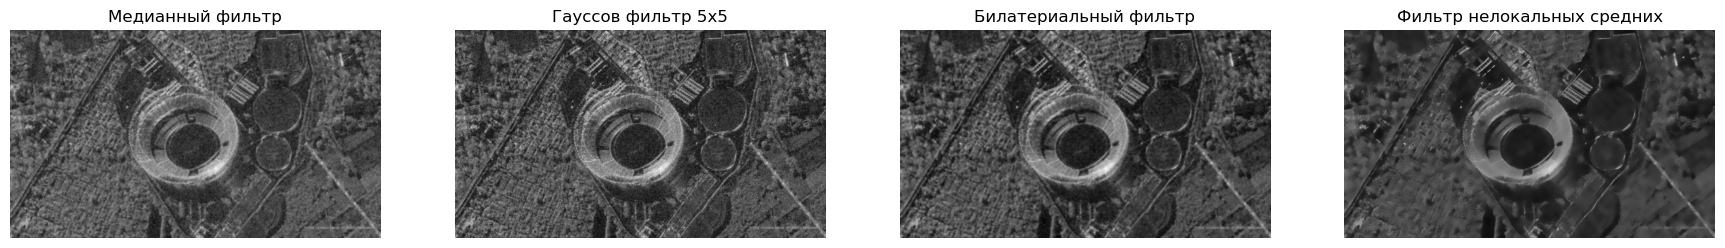

In [5]:
#список для хранения метрик
mse_values = []
ssim_values = []

#функция для вывода метрик
def display_metrics(noisy_image, filtered_image, original_image):
    mse_val = mean_squared_error(original_image, filtered_image)
    ssim_val, _ = ssim(original_image, filtered_image, full=True)
    mse_values.append(mse_val)
    ssim_values.append(ssim_val)
    
    return mse_val, ssim_val

#фильтрация с использованием различных фильтров

plt.figure(figsize=(22, 6))

#медианный фильтр
plt.subplot(1,4,1)
image_median = cv2.medianBlur(noisy_image, 5)
plt.imshow(image_median, cmap='gray')
plt.title("Медианный фильтр")
plt.axis('off')

mse_median, ssim_median = display_metrics(noisy_image, image_median, image_gray)
print(f"MSE (Медианный фильтр): {mse_median}, SSIM: {ssim_median}")

#Гауссов фильтр
plt.subplot(1,4,2)
image_gauss = cv2.GaussianBlur(noisy_image, (5, 5), 0)
plt.imshow(image_gauss, cmap='gray')
plt.title("Гауссов фильтр 5x5")
plt.axis('off')

mse_gauss, ssim_gauss = display_metrics(noisy_image, image_gauss, image_gray)
print(f"MSE (Гауссов фильтр): {mse_gauss}, SSIM: {ssim_gauss}")

#билатериальный фильтр
plt.subplot(1,4,3)
image_bilat = cv2.bilateralFilter(noisy_image, 9, 75, 75)
plt.imshow(image_bilat, cmap='gray')
plt.title("Билатериальный фильтр")
plt.axis('off')

mse_bilat, ssim_bilat = display_metrics(noisy_image, image_bilat, image_gray)
print(f"MSE (Билатериальный фильтр): {mse_bilat}, SSIM: {ssim_bilat}")

#фильтр нелокальных средних
plt.subplot(1,4,4)
image_nlm = cv2.fastNlMeansDenoising(noisy_image, None, 30, 7, 21)
plt.imshow(image_nlm, cmap='gray')
plt.title("Фильтр нелокальных средних")
plt.axis('off')

mse_nlm, ssim_nlm = display_metrics(noisy_image, image_nlm, image_gray)
print(f"MSE (Фильтр нелокальных средних): {mse_nlm}, SSIM: {ssim_nlm}")

plt.show()

3. Сравнение результатов

In [6]:
#наилучший фильтр
best_mse = min(mse_values)
best_ssim = max(ssim_values)

print(f"Лучший MSE: {best_mse}")
print(f"Лучший SSIM: {best_ssim}")

if best_mse == mse_median:
    print("Лучший фильтр: Медианный фильтр")
elif best_mse == mse_gauss:
    print("Лучший фильтр: Гауссов фильтр")
elif best_mse == mse_bilat:
    print("Лучший фильтр: Билатериальный фильтр")
else:
    print("Лучший фильтр: Нелокальные средние")

Лучший MSE: 176.77215432098765
Лучший SSIM: 0.6771762231922188
Лучший фильтр: Гауссов фильтр
